In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Decision Tree Output: 

Documentation link https://scikit-learn.org/stable/modules/tree.html#tree

1. .predict(x) --> it predicts the class in which the x lies 

2. .predict_proba(x) -->  the probability of each class can be predicted, which is the fraction of training samples of the class in a leaf:
    

In [26]:
>>> from sklearn import tree
>>> X1 = [[0, 0], [1, 1]]
>>> Y1 = ['class1', 'class2']
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X1, Y1)

In [27]:
# here [2,2] is proposed to be in 'class2'
>>> clf.predict([[2., 2.]])

array(['class2'], dtype='<U6')

In [13]:
>>> clf.predict_proba([[2., 2.]])

array([[0., 1.]])

# Training and visualizing

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Making Predictions

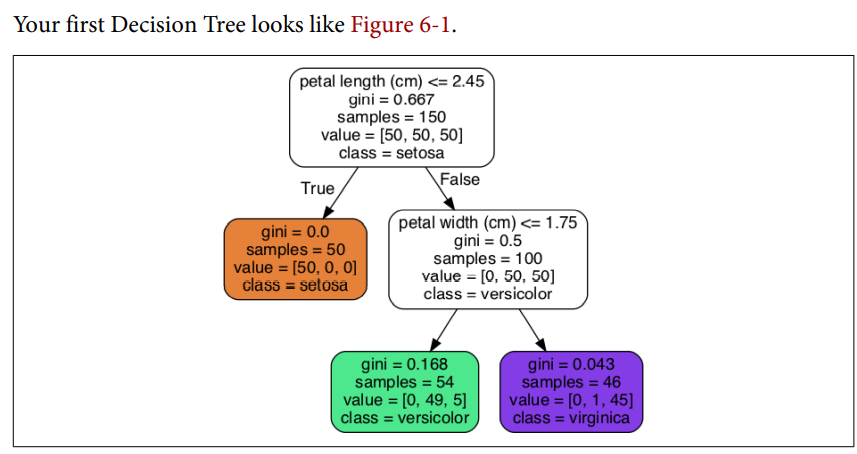

Let’s see how the tree represented in Figure 6-1 makes predictions. Suppose you find
an iris flower and you want to classify it. You start at the root node (depth 0, at the
top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is,
then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any child nodes), so it does not ask any questions: simply
look at the predicted class for that node, and the Decision Tree predicts that your
flower is an Iris setosa (class=setosa).

In fact, they don’t require feature scal‐
ing or centering at all.

A
node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris setosa, 1 Iris versicolor,
and 45 Iris virginica. 

Finally, a node’s gini attribute measures its impurity: a node is
“pure” (gini=0) if all training instances it applies to belong to the same class. For
example, since the depth-1 left node applies only to Iris setosa training instances, it is
pure and its gini score is 0.

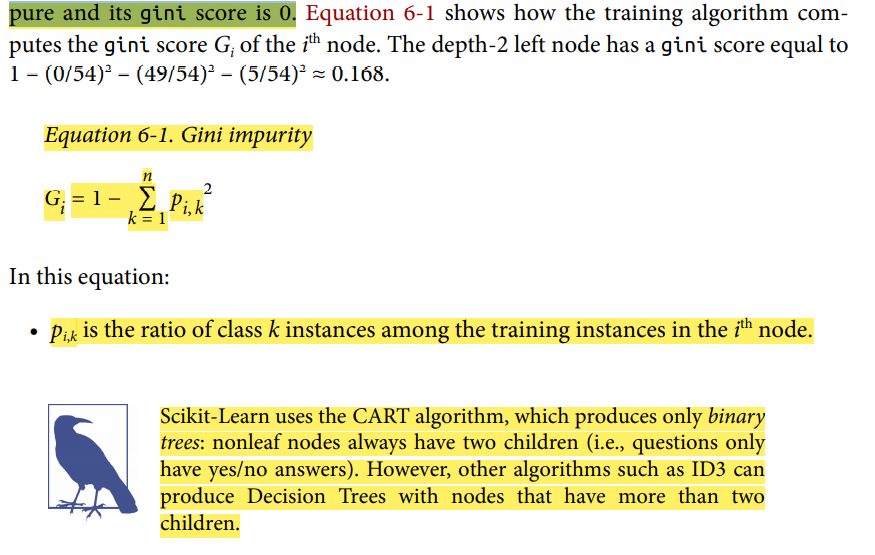

In [7]:
# Gini Score - purity of the node, if the node only have one class then its pure with score 0
# giniscore for depth 2 right cell 
gini = 1 - ((0/46)**2) - ((1/46)**2) - ((45/46)**2)
gini

0.04253308128544431

Saving figure decision_tree_decision_boundaries_plot


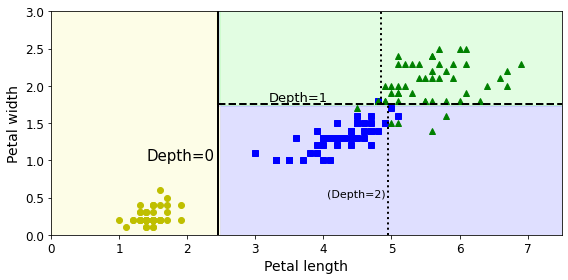

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Figure shows this Decision Tree’s decision boundaries. The thick vertical line rep‐
resents the decision boundary of the root node (depth 0): petal length = 2.45 cm.
Since the lefthand area is pure (only Iris setosa), it cannot be split any further. How‐
ever, the righthand area is impure, so the depth-1 right node splits it at petal width =
1.75 cm (represented by the dashed line). Since max_depth was set to 2, the Decision
Tree stops right there. If you set max_depth to 3, then the two depth-2 nodes would
each add another decision boundary (represented by the dotted lines).


# Estimating (1) Class & (2) Probabilities

For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output
the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it should out‐
put Iris versicolor (class 1) because it has the highest probability. 

In [17]:
# Class probabilities 
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
# class predition i.e. in class 1 
tree_clf.predict([[5, 1.5]])

# The CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The algorithm works by first splitting the
training set into two subsets using a single feature k and a threshold tk
 (e.g., “petal
length ≤ 2.45 cm”). How does it choose k and tk
? It searches for the pair (k, tk
) that
produces the purest subsets (weighted by their size). Equation 6-2 gives the cost func‐
tion that the algorithm tries to minimize

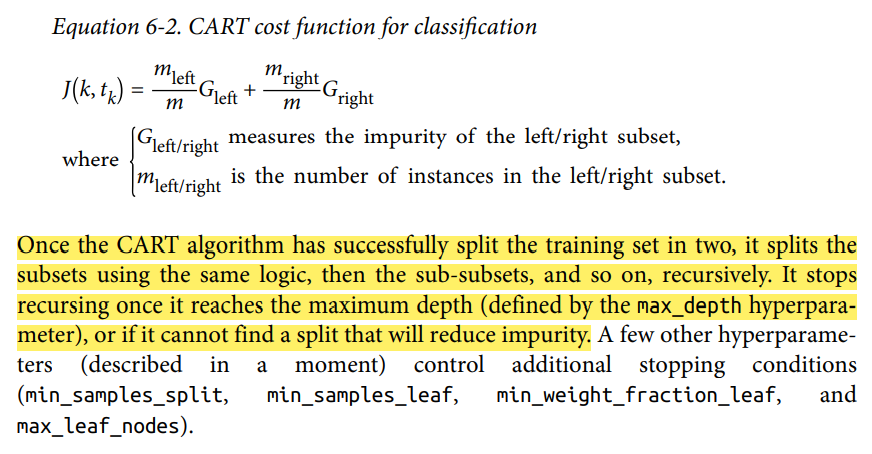

# Gini Impurity or Entropy?
By default, the Gini impurity measure is used, but you can select the entropy impurity
measure instead by setting the criterion hyperparameter to "entropy".

In Machine Learning, entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.
Equation 6-3 shows the definition of the entropy of the i
th node. For example, the
depth-2 left node in Figure 6-1 has an entropy equal to –(49/54) log2
(49/54) – (5/54)
log2
 (5/54) ≈ 0.445.

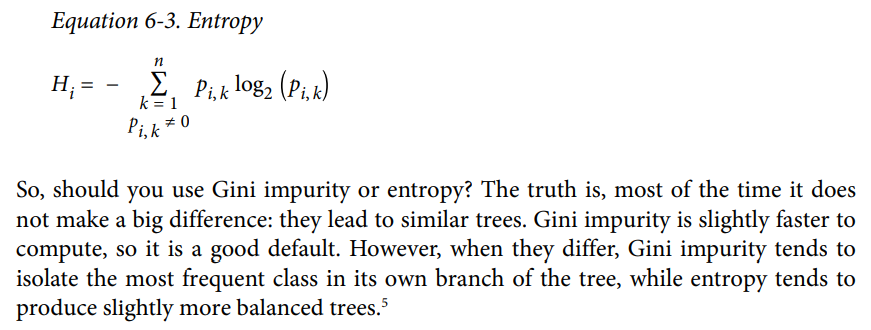

In [39]:
# Calculation of above 
-(49/54)*np.log2 (49/54)-(5/54)*np.log2 (5/54)

0.44506485705083865

# Information Gain 

In [41]:
from IPython.display import HTML
video_path = 'Tutorial 38- Decision Tree Information Gain.mp4'

HTML("""
<video width="840" height="460" controls="">
<source src="{0}">
</video>
""".format(video_path))

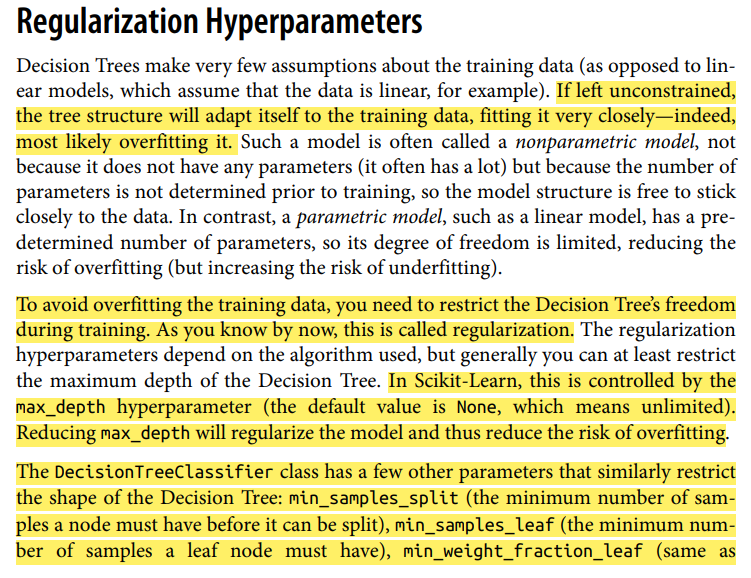

Figure below shows two Decision Trees trained on the moons dataset (introduced in
Chapter 5). On the left the Decision Tree is trained with the default hyperparameters
(i.e., no restrictions), and on the right it’s trained with min_samples_leaf=4. It is
quite obvious that the model on the left is overfitting, and the model on the right will
probably generalize better.


Saving figure min_samples_leaf_plot


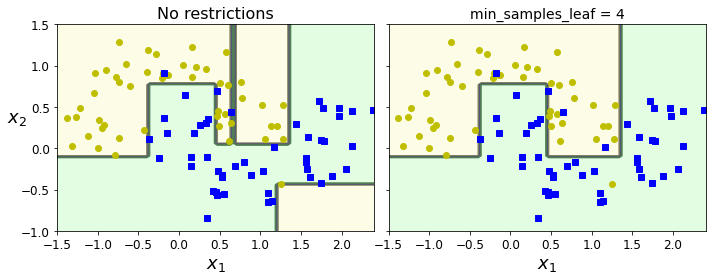

In [30]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

# High Variance
We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree. Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value than earlier:

In [28]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=36)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=36)

Saving figure decision_tree_instability_plot


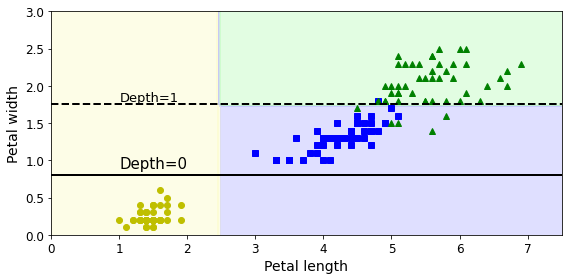

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()


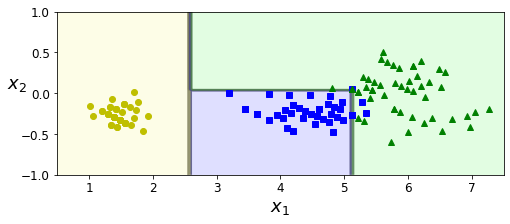

In [31]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

# Regression trees

Let’s build a regres‐
sion tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy
quadratic dataset with max_depth=2:

In [32]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

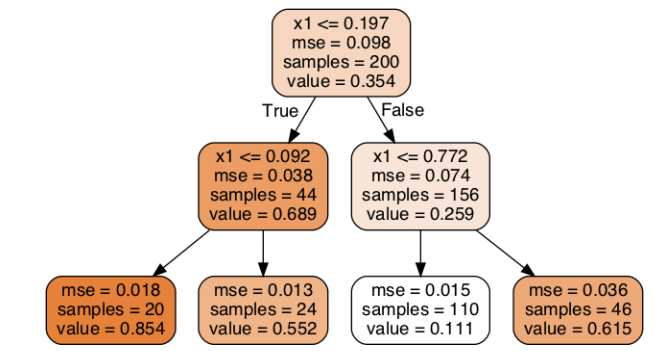

This tree looks very similar to the classification tree you built earlier. The main differ‐
ence is that instead of predicting a class in each node, it predicts a value

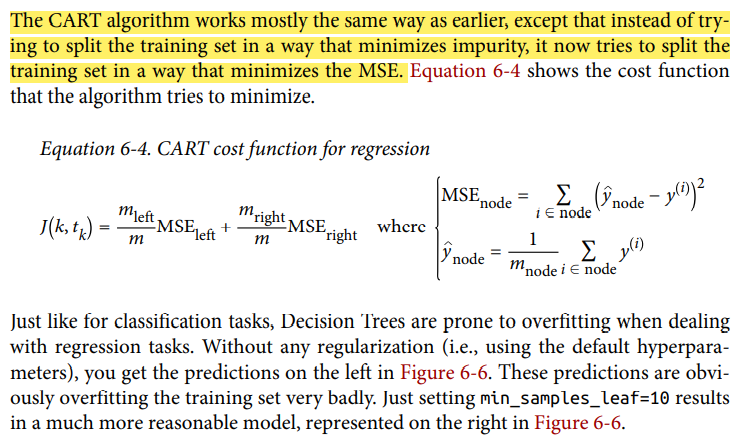

Saving figure tree_regression_regularization_plot


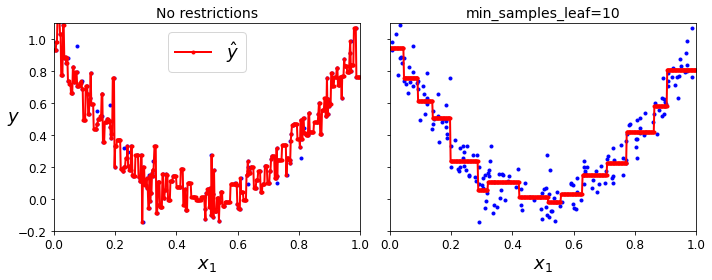

In [34]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

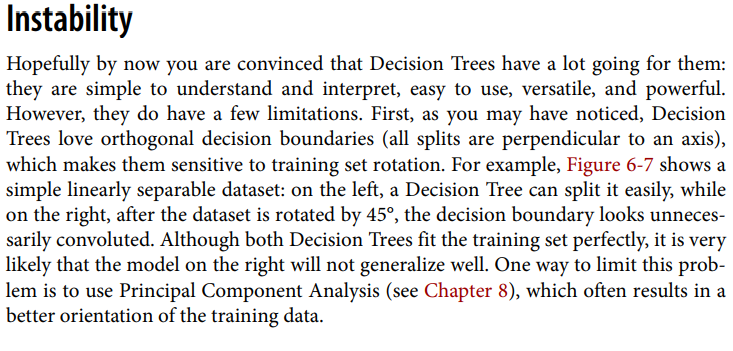

Saving figure sensitivity_to_rotation_plot


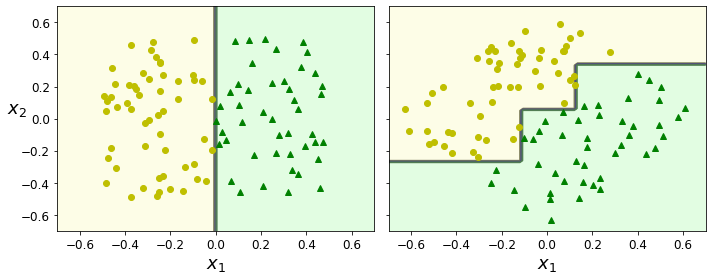

In [35]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()